# Полносвязная нейронная сеть для распознавания цифр в PyTorch

In [18]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

In [14]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
device

device(type='cuda')

## Задание гиперпараметров

In [15]:
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.01

## Загрузка датасета

In [58]:
train = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True) 
test = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=False) 
train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size=batch_size, shuffle=False)

In [59]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


## Примеры входных данных

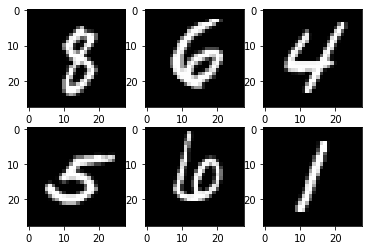

In [93]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

## Создание и обучение сети

### Определение модели

In [61]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

### Создание модели, определение функции потерь и оптимизатора

In [62]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

### Цикл обучения

In [63]:
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # прямой проход
        outputs = model(images)
        
        # потери
        loss = loss_fn(outputs, labels)
        
        # обратный проход
        optimizer.zero_grad()
        loss.backward()
        
        # обновление параметров
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1} / {n_total_steps}, loss = {loss.item():.3f}')

epoch 1 / 5, step 100 / 600, loss = 0.190
epoch 1 / 5, step 200 / 600, loss = 0.220
epoch 1 / 5, step 300 / 600, loss = 0.317
epoch 1 / 5, step 400 / 600, loss = 0.079
epoch 1 / 5, step 500 / 600, loss = 0.189
epoch 1 / 5, step 600 / 600, loss = 0.330
epoch 2 / 5, step 100 / 600, loss = 0.100
epoch 2 / 5, step 200 / 600, loss = 0.052
epoch 2 / 5, step 300 / 600, loss = 0.154
epoch 2 / 5, step 400 / 600, loss = 0.111
epoch 2 / 5, step 500 / 600, loss = 0.039
epoch 2 / 5, step 600 / 600, loss = 0.056
epoch 3 / 5, step 100 / 600, loss = 0.087
epoch 3 / 5, step 200 / 600, loss = 0.111
epoch 3 / 5, step 300 / 600, loss = 0.039
epoch 3 / 5, step 400 / 600, loss = 0.143
epoch 3 / 5, step 500 / 600, loss = 0.109
epoch 3 / 5, step 600 / 600, loss = 0.146
epoch 4 / 5, step 100 / 600, loss = 0.170
epoch 4 / 5, step 200 / 600, loss = 0.026
epoch 4 / 5, step 300 / 600, loss = 0.064
epoch 4 / 5, step 400 / 600, loss = 0.181
epoch 4 / 5, step 500 / 600, loss = 0.219
epoch 4 / 5, step 600 / 600, loss 

### Расчёт точности

In [64]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predictions = torch.max(outputs, 1)
        
        n_samples += labels.shape[0]
        n_correct = (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc:.2f}')

accuracy = 0.97


### Демонстрация работы нейронной сети

Prediction = tensor([9], device='cuda:0')


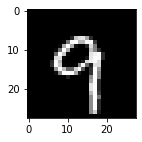

In [92]:
# вывести цифру и предсказанный класс (можно запускать несколько раз)
to_predict = iter(train_loader)
sample, label = to_predict.next()
output = model(sample[0].reshape(-1, 28*28).to(device))
_, prediction = torch.max(output, 1)
plt.figure(figsize = (5,2))
plt.imshow(sample[0][0], cmap='gray')
print(f'Prediction = {prediction}')